# **THE Spark Foundation -GRIP - Data Science and Business Analytics - August'21**
# **Task 1 : Prediction Using Supervised ML**
# **Author : Akash Elangovan**

Dataset Used : It can be downloded through the following link :- http://bit.ly/w-data

Predict the percentage of an student based on the no. of study hours.This is a simple linear regression task as it involves just 2 variable.

In [12]:
#Importing Libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [13]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [14]:
#Import Dataset
df=pd.read_csv("data.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [15]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [17]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

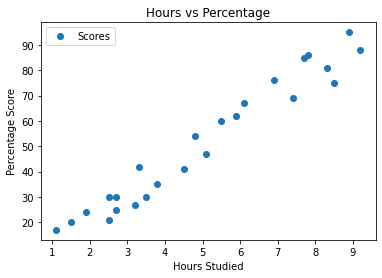

In [18]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [19]:
#correlation is usefull for getting the relationship between attributes.
#by default it will give the correlation by pearson method
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


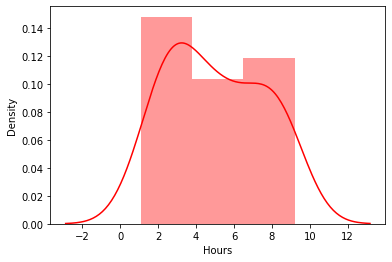

In [20]:
sb.distplot(df['Hours'],color='red');

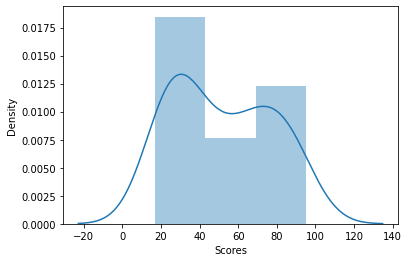

In [21]:
sb.distplot(df['Scores']);

In [22]:
#Splitting the dataset into independent and dependent variaable
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [23]:
#Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
#Training the linear regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
algo=LinearRegression()

In [26]:
algo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
#predicting the results
y_pred=regressor.predict(X_test)

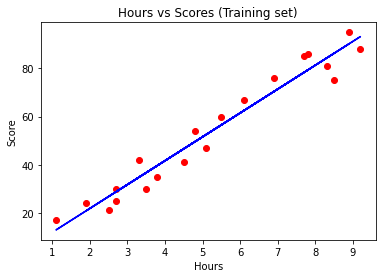

In [28]:
#Visualising the training set result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

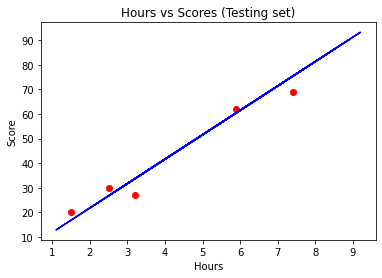

In [29]:
#Visualising the test set result
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Scores (Testing set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [30]:
pred=algo.predict(X_test)
pd.DataFrame({'ACTUAL_VALUE':y_test,'PREDICTED_VALUE':pred})

,ACTUAL_VALUE,PREDICTED_VALUE
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [31]:
#Predicting the result
prediction=regressor.predict([[9.5]])
prediction

array([96.16939661])

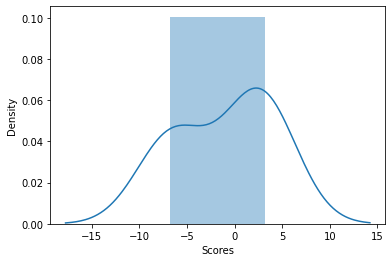

In [32]:
sb.distplot(y_test-pred)

In [33]:
h=9.25
a=algo.predict([[h]])
print('if student studies for {} hours per day he/she is likely to score {}%'.format(h,*a))

if student studies for 9.25 hours per day he/she is likely to score 93.69173248737539%


In [34]:
# Checking the r2 score and mean absolute error
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


In [35]:
#Checking the accuracy of model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9454906892105354